In [1]:
from __future__ import division
import matplotlib
from pylab import *
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress
from scipy.signal import argrelextrema
import numpy as np
import pandas as pd
import math
#import h5py

from lmfit import minimize, Parameters, Parameter, report_fit
from scipy.integrate import odeint

import scipy
import scipy.io as sio

In [2]:
# Define some plotting styles that we will use.
fontSize=15
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Avenir','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
plotStyles={"markersize":12,"markeredgewidth":2.0,"linewidth":2.0}
stepStyles={"markersize":15,"markeredgewidth":3.0,"linewidth":4.0,"where":"post"}
scatterStyles={"linewidth":1.0}

# 1 Load data

In [4]:
df=pd.read_csv('../data/TECAN_230212.csv',delimiter=',',index_col=0, ) 

ydata1 = df.loc['E5'].to_numpy()
ydata2 = df.loc['E6'].to_numpy()
ydata3 = df.loc['F5'].to_numpy()
ydata4 = df.loc['F6'].to_numpy()

ymean0 = (ydata1+ydata3+ydata4)/3; 

# 2 OD to cell concentration conversion

In [5]:
# Define some plotting styles that we will use.
fontSize=15
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Avenir','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
plotStyles={"markersize":12,"markeredgewidth":2.0,"linewidth":2.0}
stepStyles={"markersize":15,"markeredgewidth":3.0,"linewidth":4.0,"where":"post"}
scatterStyles={"linewidth":1.0}

/Users/turtle/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


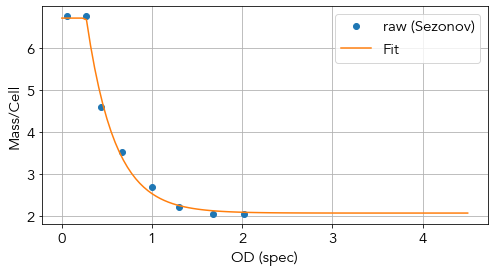

In [6]:
tmp = np.genfromtxt("../data/Default Dataset.csv", delimiter=",")
xtmp = tmp[:,0]
ytmp = tmp[:,1]

def func_conversion(x,a,b,c,d):
    if x < 0.27:
        return np.exp(-b*0.27)*c+d
    else:
        return np.exp(-b*x)*c+d

func_conversion = np.vectorize(func_conversion)
popt_conv,pcov_conv = curve_fit(func_conversion, xtmp, ytmp, p0=[0.6, 1,1, 2])


matplotlib.rcParams.update({"figure.figsize": (8,4)})
plt.plot(xtmp, ytmp, 'o',label='raw (Sezonov)')
plt.plot(np.linspace(0,4.5,100),func_conversion(np.linspace(0,4.5,100),*popt_conv),'-',label='Fit')
plt.xlabel('OD (spec)')
plt.ylabel('Mass/Cell')
plt.grid(True)
plt.legend()

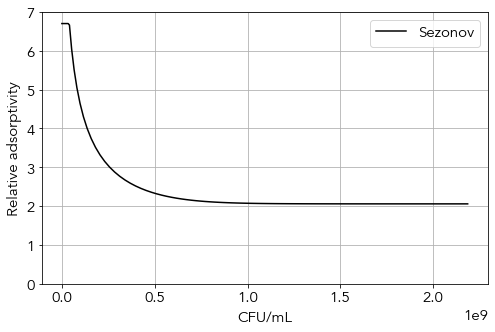

In [7]:
matplotlib.rcParams.update({"figure.figsize": (8,5)})

spec_OD = np.linspace(0,4.5,100);  #mass per mL
mass_per_cell = func_conversion(spec_OD,*popt_conv); 
CFU_per_mL = spec_OD/mass_per_cell*1e9;
#CFU_per_mL = spec_OD/mass_per_cell*2e9;

plt.plot(CFU_per_mL, mass_per_cell, color='k',label='Sezonov')

#plt.plot(TECAN_OD, TECAN_OD*2.2*1e9, color='tab:red',label='Linear',alpha=0.5)
plt.grid(True)
plt.ylabel('Relative adsorptivity')
plt.xlabel('CFU/mL')
plt.ylim((0,7))
#plt.xlim((0,1e9))
plt.legend()

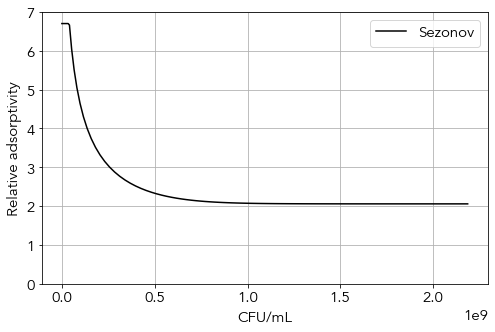

In [8]:
matplotlib.rcParams.update({"figure.figsize": (8,5)})

spec_OD = np.linspace(0,4.5,100);  #mass per mL
mass_per_cell = func_conversion(spec_OD,*popt_conv); 
CFU_per_mL = spec_OD/mass_per_cell*1e9;
#CFU_per_mL = spec_OD/mass_per_cell*2e9;


TECAN_OD = spec_OD/4.5; 
plt.plot(CFU_per_mL, mass_per_cell, color='k',label='Sezonov')
#plt.plot(CFU_per_mL, TECAN_OD, color='k',label='Sezonov')
#plt.plot(TECAN_OD, TECAN_OD*2.2*1e9, color='tab:red',label='Linear',alpha=0.5)
plt.grid(True)
plt.ylabel('Relative adsorptivity')
plt.xlabel('CFU/mL')
plt.ylim((0,7))
#plt.xlim((0,1e9))
plt.legend()

In [9]:
def uninfected_OD_to_CFU(TECAN_OD):
    spec_OD = TECAN_OD*4.5; 
    CFU_per_mL = spec_OD/func_conversion(spec_OD,*popt_conv)*1e9; 
    return CFU_per_mL

No handles with labels found to put in legend.


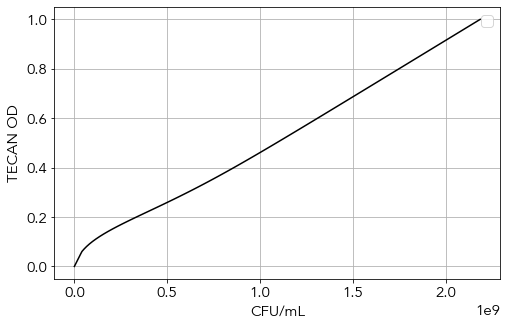

In [10]:
matplotlib.rcParams.update({"figure.figsize": (8,5)})

spec_OD = np.linspace(0,4.5,100);  #mass per mL
mass_per_cell = func_conversion(spec_OD,*popt_conv); 
CFU_per_mL = spec_OD/mass_per_cell*1e9;

TECAN_OD1 = spec_OD/4.5; 
#TECAN_OD2 = CFU_per_mL*mass_per_cell/1e9/4.5; 


##########################################

plt.plot(CFU_per_mL, TECAN_OD1,color='k')
#plt.plot(TECAN_OD, TECAN_OD*conversion_*1e9, color='tab:green',label='try')
#plt.plot(TECAN_OD2, CFU_per_mL, color='tab:red',label='2',alpha=0.5)
plt.grid(True)
plt.xlabel('CFU/mL')
plt.ylabel('TECAN OD')
plt.legend()

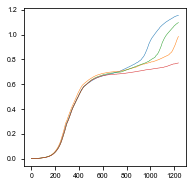

In [16]:
tdata = (df.iloc[0][6:] - df.iloc[0][6])/60; 
xdata = {};
j = 0; 
for i in ['E3','E4','F3','F4']:
    xdata[j] = df.loc[i][6:].to_numpy() - ymean0[6:];
    plt.plot(tdata,xdata[j],lw=0.5)
    j = j+1;

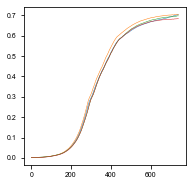

In [17]:
tdata = (df.iloc[0][6:125] - df.iloc[0][6])/60; 
xdata = {};
j = 0; 
for i in ['E3','E4','F3','F4']:
    xdata[j] = df.loc[i][6:125].to_numpy() - ymean0[6:125];
    plt.plot(tdata,xdata[j],lw=0.5)
    j = j+1;

In [18]:
h = 100;

def k_sigmoidal(F, thr1b,thr2b,k1b,k2b,k3b,h):
    return k3b + (k2b-k3b)*1/(1+np.exp(-h*(F-thr2b))) + (k1b-k2b)*1/(1+np.exp(-h*(F-thr1b)))

def f0(x, t, ps):
    try:
        k1 = ps['k1'].value
        k2 = ps['k2'].value
        k3 = ps['k3'].value
        v1 = ps['v1'].value
        v2 = ps['v2'].value
        v3 = ps['v3'].value
        e = ps['e'].value
        thr1 = ps['thr1'].value
        thr2 = ps['thr2'].value
    except:
        k1, k2, k3, v1, v2, v3, e, thr1, thr2 = ps
        
    R, N  = x; 
    
    thr_min = min(thr1, thr2)
    thr_max = max(thr1, thr2)
    
    
    v_ = k_sigmoidal(R, thr_max,thr_min,v1,v2,v3,h);
    k_ = k_sigmoidal(R, thr_max,thr_min,k1,k2,k3,h);

    phi = R/(k_+R);
    dR = -e*phi*v_*N
    dN = v_*phi*N
    
    return [dR, dN]

def g2(t, x0, ps):
    x = odeint(f0, x0, t, args=(ps,))
    return x[:,1]

def residual1(ps, ts, tdata, xdata):
    res_reweight = np.array([]); 
    ds_arr = list(xdata.keys())
    
    k = 0;
    tmp = 0; 
    x00 = np.zeros(len(ds_arr)); 
    for ds_ in ds_arr: 
        x00_tmp = xdata[ds_][0];
        x00[k] = uninfected_OD_to_CFU(x00_tmp)/1e9; ### This is the CFU per mL 
        k = k+1;

    for ds_ in ds_arr: 
        time_raw = tdata; 
        data_real = uninfected_OD_to_CFU(xdata[ds_])/1e9; 
        data_simul = np.zeros(len(time_raw)); 
        
        x0 = [1, np.mean(x00)];
        OD_tmp = g2(ts, x0, ps); 
        z = 0; 
        for j in time_raw:
            t_i = np.where(ts>j)[0][0];
            data_simul[z] = OD_tmp[t_i];
            z = z+1;
        res_weight_tmp = data_simul - data_real;
        res_weight_tmp[10:60] = res_weight_tmp[10:60]*10; 
        res_reweight = np.append(res_reweight, res_weight_tmp)
        
    tmp = 0; 
    #if abs(ps['thr1'].value-ps['thr2'].value) < 0.1 or max(ps['thr1'].value,ps['thr2'].value) > 0.9:
    #    tmp = 1000;
    if (ps['v1'].value-ps['v2'].value) < 0 or (ps['v2'].value-ps['v3'].value) < 0:
        tmp = 1000;
    return res_reweight + tmp

In [ ]:
from lmfit import minimize, Parameters, Parameter, report_fit
from scipy.integrate import odeint

N = 10; 
k1b_ = np.zeros(N); 
k2b_ = np.zeros(N); 
k3b_ = np.zeros(N); 
v1b_ = np.zeros(N); 
v2b_ = np.zeros(N); 
v3b_ = np.zeros(N); 
eb_ = np.zeros(N); 
thr1b_ = np.zeros(N); 
thr2b_ = np.zeros(N); 

t_0 = time.time() 
for i_ in range(N):

    t = linspace(0,800,800);  

    params = Parameters()
    params.add('k1', value=0.2, min=0.1, max=1)
    params.add('k2', value=0.2, min=0.1, max=1)
    params.add('k3', value=0.2, min=0.1, max=1)
    params.add('v1', value=np.log(2)/20, min=np.log(2)/30, max=1/2)
    params.add('v2', value=np.log(2)/30, min=np.log(2)/100, max=1/2)
    params.add('v3', value=np.log(2)/40, min=np.log(2)/200, max=np.log(2)/30)
    params.add('e', value=1, min=0.01, max=5)
    params.add('thr1', value=0.4, min=0.01, max=1)
    params.add('thr2', value=0.2, min=0.01, max=1)

    result = minimize(residual1, params, args=(t,tdata,xdata), method='dual_annealing',nan_policy='omit')
    
    k1b = result.params['k1'].value;
    k2b = result.params['k2'].value;
    k3b = result.params['k3'].value;
    v1b = result.params['v1'].value;
    v2b = result.params['v2'].value;
    v3b = result.params['v3'].value;
    eb = result.params['e'].value;
    thr1b = result.params['thr1'].value;
    thr2b = result.params['thr2'].value;
    
    k1b_[i_] = k1b;
    k2b_[i_] = k2b; 
    k3b_[i_] = k3b; 
    v1b_[i_] = v1b;
    v2b_[i_] = v2b;
    v3b_[i_] = v3b;
    eb_[i_] = eb;
    thr1b_[i_] = thr1b;
    thr2b_[i_] = thr2b;

elapsed = time.time() - t_0
print(elapsed)

In [ ]:
for arr in (k1b_, k2b_, k3b_, v1b_, v2b_, v3b_, eb_, thr1b_, thr2b_):
    print(arr)

In [19]:
'''
k1b = 0.99999517
k2b = 0.64231205
k3b = 0.46954505
v1b = 0.04151561
v2b = 0.04151561
v3b = 0.01398928
eb = 0.68824753
thr1b = 0.85127981
thr2b = 0.57862118
'''


v1b = 0.031
v2b = 0.029
v3b = 0.014
k1b = 0.52
k2b = 0.55
k3b = 0.65
thr1b = 0.72
thr2b = 0.48
eb = 0.67


In [ ]:
XX = np.array([[0.58054807, 0.41506215, 0.59402241, 0.42047235, 0.5705226,  0.86546418,\
 0.63185896, 0.82741421, 0.2383898,  0.85127981],\
[0.40816258, 0.58472884, 0.91111926, 0.58909497, 0.24701761, 0.59907709,\
 0.84487135, 0.62622955, 0.57058894, 0.57862118]])
XX1 = np.max(XX,axis=0)
XX2 = np.min(XX,axis=0)
for arr in (XX1, XX2):
    print(np.mean(arr))
    print(np.std(arr)/np.sqrt(N))
    print('===========')

In [ ]:
'''
for arr in (k1b_, k2b_, k3b_, v1b_, v2b_, v3b_, eb_, thr1b_, thr2b_):
    print(np.mean(arr))
    print(np.std(arr)/np.sqrt(N))
    print('===========')
'''
k1b = np.mean(k1b_)
k2b = np.mean(k2b_)
k3b = np.mean(k3b_)
v1b = np.mean(v1b_)
v2b = np.mean(v2b_)
v3b = np.mean(v3b_)
eb = np.mean(eb_)
thr1b = np.mean(thr2b_)
thr2b = np.mean(thr1b_)

In [37]:
'''
k1b = 0.9996295506541937;
k2b = 0.6115312706050637;
k3b = 0.6222615681433081;
v1b = 0.04143262802533914;
v2b = 0.04143261816022758;
v3b = 0.012794577043254957;
eb = 0.6700382524907262;
thr1b = 0.8399959738618188;
thr2b = 0.5420999836114633;
'''
v1b = 0.031
v2b = 0.029
v3b = 0.014
k1b = 0.52
k2b = 0.55
k3b = 0.65
thr1b = 0.72
thr2b = 0.48
eb = 0.67

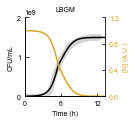

In [38]:
#############################

ylim_max = 0.5; 
data_color = 'lightgray'
model_cell_color = 'black' #[44/255,162/255,95/255,1]#'lightgreen'


##############################

myt = (df.iloc[0][6:125] - df.iloc[0][6])/3600;
t_offset = 0  #df.iloc[0].to_numpy()[6]/3600; 

##############################
psb_LBM = [k1b, k2b, k3b, v1b, v2b, v3b, eb, thr1b, thr2b];

tsb = linspace(0,800,800);

k = 0;
ds_arr = list(xdata.keys())
x00 = np.zeros(len(ds_arr)); 
for ds_ in ds_arr: 
    x00_tmp = xdata[ds_][0];
    x00[k] = uninfected_OD_to_CFU(x00_tmp)/1e9; ### This is the CFU per mL 
    k = k+1;

x0 = [1, np.mean(x00)];
x = odeint(f0, x0, tsb, args=(psb_LBM,))

##############################

myF = x[:,0]; 

fontSize=7
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Arial','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
matplotlib.rcParams.update({"figure.figsize": (1.45,1.45)})
ax = plt.subplot(1,1,1)


for i in ['E3','E4','F3','F4']:
    ydata = df.loc[i][6:125].to_numpy() - ymean0[6:125]; 
    ydata = uninfected_OD_to_CFU(ydata)/1e9;   ### This is the CFU per mL 
    
    if i == 'E3':
        plt.plot(myt, ydata*1e9,'o',markersize=3, color=data_color,label='Data')
    else:
        plt.plot(myt, ydata*1e9,'o',markersize=3, color=data_color)
plt.title('LBGM')
plt.plot((tsb+t_offset)/60, x[:,1]*1e9,linewidth=1.5,  color=model_cell_color, label='Model')
ax.set_ylabel('CFU/mL', color=model_cell_color) 
ax.tick_params(axis='y', labelcolor=model_cell_color)
ax.set_xlabel('Time (h)')
plt.xticks([0,6,12],[0,6,12])
#ax.set_ylabel('$OD_{600}$')
ax.set_xlim((0,800/60))
#plt.yscale('log')
plt.ylim((0,2e9))
ax.set_yticks([0,1e9,2e9])
#ax.set_yticklabels(['$10^{-3}$','$10^{-1}$','$10^{1}$'])

ax2 = ax.twinx()
ax2.plot((tsb+t_offset)/60, x[:,0],linewidth=1.5,  color='goldenrod', label='Model (nutrient)')
ax2.set_ylabel('[N] (A.U.)', color='goldenrod') 
ax2.tick_params(axis='y', labelcolor='goldenrod')
ax2.set_ylim((0,1.2))
ax2.set_yticks([0, 0.4,0.8, 1.2])


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
ax2.spines['top'].set_visible(False)
ax2.tick_params(axis="y",direction="in")
ax2.tick_params(axis="x",direction="in")

#ax.legend(frameon=False,loc='lower right',ncol=1)
#plt.savefig('../output/Sfig6a.pdf', format='pdf', bbox_inches='tight')

### Fit adsorptivity as a function of N

1.0
1.9883112371579443
[5.17126642e-01 4.38853246e+00 1.06624159e+00 3.97011093e-06
 2.30684153e+02]


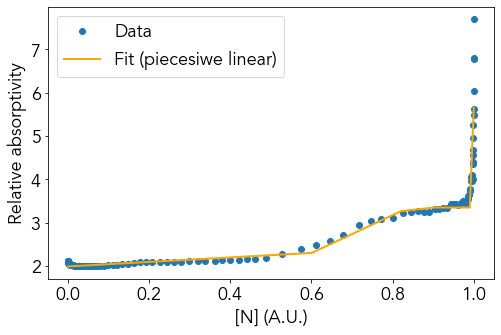

In [39]:
from numpy.polynomial import Polynomial


#CFU_per_mL = x[:,1];
myt = (df.iloc[0][6:125] - df.iloc[0][6])/60; #minute, 0 
OD_TECAN = df.loc['E3'][6:125].to_numpy() - ymean0[6:125]; #start from non zero


OD_spec = OD_TECAN*4.5;

#CFU_per_mL = uninfected_OD_to_CFU(OD_TECAN)/1e9; 
#adsorptivity = OD_spec/CFU_per_mL; 

C_arr = np.array([]);
for i in myt:
    C_arr = np.append(C_arr, x[round(i),1])

adsorptivity = OD_spec/C_arr;


N_arr = np.array([]);
for i in myt:
    N_arr = np.append(N_arr, x[round(i),0])


max_ab = max(adsorptivity);
min_ab = min(adsorptivity);
N0_ab = N_arr[0];
print(N0_ab)
print(min_ab)

def poly5(x, c1,c2,c3,c4,c5):
    if x < 0.6:
        return min_ab + c1*x
    elif x < 0.82:
        return min_ab + c1*0.6 + c2*(x-0.6)
    elif x < 0.9:
        return min_ab + c1*0.6 + c2*(0.82-0.6) + abs(c3*(x-0.82)) 
    elif x < 0.99:
        return min_ab + c1*0.6 + c2*(0.82-0.6) + abs(c3*(0.9-0.82)) + abs(c4*(x-0.9)) 
    else:
        return min_ab + c1*0.6 + c2*(0.82-0.6) + abs(c3*(0.9-0.82)) + abs(c4*(0.99-0.9)) + c5*(x-0.99)
    
poly5 = np.vectorize(poly5)


fontSize=18
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Avenir','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
plotStyles={"markersize":12,"markeredgewidth":2.0,"linewidth":2.0}
stepStyles={"markersize":15,"markeredgewidth":3.0,"linewidth":4.0,"where":"post"}
scatterStyles={"linewidth":1.0}

matplotlib.rcParams.update({"figure.figsize": (8,5)})

popt1, pcov1 = curve_fit(poly5, N_arr, adsorptivity,p0=[0.5,1.0,0.00,0.1,100],\
                        maxfev = 20000)
print(popt1)
#popt1 = [-8.71193124, 37.15096412, -76.22902199, 73.68755247]
plt.plot(N_arr, adsorptivity ,'o',label='Data')
#plt.axvline(x=N_arr[12])
n_test = np.linspace(0,1,1000)
plt.plot(n_test, poly5(n_test,*popt1),color='orange',lw=2, label='Fit (piecesiwe linear)')
plt.xlabel('[N] (A.U.)')
plt.ylabel('Relative absorptivity')
plt.legend()
#plt.yscale('log')
#plt.ylim((0,7))

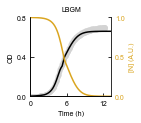

In [46]:
#############################

ylim_max = 0.5; 
data_color = 'lightgray'
model_cell_color = 'black' #[44/255,162/255,95/255,1]#'lightgreen'


##############################

myt = (df.iloc[0][6:125] - df.iloc[0][6])/3600;
t_offset = 0  #df.iloc[0].to_numpy()[6]/3600; 

##############################
psb_LBM = [k1b, k2b, k3b, v1b, v2b, v3b, eb, thr1b, thr2b];

tsb = linspace(0,800,800);

k = 0;
ds_arr = list(xdata.keys())
x00 = np.zeros(len(ds_arr)); 
for ds_ in ds_arr: 
    x00_tmp = xdata[ds_][0];
    x00[k] = uninfected_OD_to_CFU(x00_tmp)/1e9; ### This is the CFU per mL 
    k = k+1;

x0 = [1, np.mean(x00)];
x = odeint(f0, x0, tsb, args=(psb_LBM,))

##############################

myF = x[:,0]; 

fontSize=7
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Arial','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
matplotlib.rcParams.update({"figure.figsize": (1.45,1.45)})
ax = plt.subplot(1,1,1)


for i in ['E3','E4','F3','F4']:
    ydata = df.loc[i][6:125].to_numpy() - ymean0[6:125]; 
    #ydata = uninfected_OD_to_CFU(ydata)/1e9;   ### This is the CFU per mL 
    
    if i == 'E3':
        plt.plot(myt, ydata,'o',markersize=3, color=data_color,label='Data')
    else:
        plt.plot(myt, ydata,'o',markersize=3, color=data_color)
plt.title('LBGM')

plt.plot((tsb+t_offset)/60, poly5(x[:,0], *popt1)*x[:,1]/4.5,linewidth=1.5,  color=model_cell_color, label='Model')
ax.set_ylabel('OD', color=model_cell_color) 
ax.tick_params(axis='y', labelcolor=model_cell_color)
ax.set_xlabel('Time (h)')
plt.xticks([0,6,12],[0,6,12])
#ax.set_ylabel('$OD_{600}$')
ax.set_xlim((0,800/60))
#plt.yscale('log')
plt.ylim((0,0.8))
ax.set_yticks([0,0.4,0.8])
#ax.set_yticklabels(['$10^{-3}$','$10^{-1}$','$10^{1}$'])

ax2 = ax.twinx()
ax2.plot((tsb+t_offset)/60, x[:,0],linewidth=1.5,  color='goldenrod', label='Model (nutrient)')
ax2.set_ylabel('[N] (A.U.)', color='goldenrod') 
ax2.tick_params(axis='y', labelcolor='goldenrod')
ax2.set_ylim((0,1.0))
ax2.set_yticks([0, 0.5,1.0])


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
ax2.spines['top'].set_visible(False)
ax2.tick_params(axis="y",direction="in")
ax2.tick_params(axis="x",direction="in")

#ax.legend(frameon=False,loc='lower right',ncol=1)
plt.savefig('../output/Sfig6a-left.pdf', format='pdf', bbox_inches='tight')

In [47]:
import xlsxwriter

# Create a workbook and add a worksheet.
workbook = xlsxwriter.Workbook("../output/Sfig6a-left.xlsx")
writer = pd.ExcelWriter("../output/Sfig6a-left.xlsx", engine = 'xlsxwriter')

df_tmptmp = pd.DataFrame(); 
df_tmptmp['Time (h)'] = myt;
for i in ['E3','E4','F3','F4']:
    ydata = df.loc[i][6:125].to_numpy() - ymean0[6:125]; 
    df_tmptmp['OD from well '+i] = ydata;
df_tmptmp = df_tmptmp.T
df_tmptmp.to_excel(writer, sheet_name = 'data') 

df_tmptmp = pd.DataFrame(); 
df_tmptmp['Time (h)'] = (tsb+t_offset)/60;
df_tmptmp['OD'] = poly5(x[:,0], *popt1)*x[:,1]/4.5;
df_tmptmp['[N] (A.U.)'] = x[:,0]; 
df_tmptmp = df_tmptmp.T
df_tmptmp.to_excel(writer, sheet_name = 'Fit') 


writer.close()

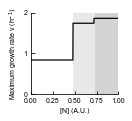

In [43]:
def k_raw(F, thr1b,thr2b,k1b,k2b,k3b):
    if F > thr1b:
        return k1b
    elif F <= thr1b and F > thr2b:
        return k2b
    else:
        return k3b
k_raw = np.vectorize(k_raw)

##############################

#thr1b = 1;
#thr2b = thrb; 

v1b__ = v1b;
v2b__ = v2b;
v3b__ = v3b;

k1b__ = k1b;
k2b__ = k2b;
k3b__ = k3b;

##############################

fontSize=7
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Arial','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
matplotlib.rcParams.update({"figure.figsize": (1.85,1.65)})
ax1 = plt.subplot(1,1,1)



#plt.title('LBM')
#plt.plot(myt, data,'o',markersize=7.5, color='grey',label='Data')
myF = x[:,0]; 
idt1 = np.where(myF<thr1b)[0][0];
#idt2 = np.where(myF<thr2b)[0][0];

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(axis="y",direction="in")
ax1.tick_params(axis="x",direction="in")

ax1.fill_between(np.arange(0,thr2b+0.01,0.01),5, color='white',alpha=0.5, edgecolor=None)
ax1.fill_between(np.arange(thr2b, thr1b+0.02,0.01),5, color='lightgrey',alpha=0.5, edgecolor=None)
ax1.fill_between(np.arange(thr1b+0.01,1.01,0.01),5, color='darkgrey',alpha=0.5, edgecolor=None)

F = np.linspace(0,1,1000)
color1 = 'k'; 
color2 = 'goldenrod'; 

ax1.plot(F, k_raw(F, thr1b,thr2b,v1b__,v2b__,v3b__)*60,linewidth=1.25,color=color1)
ax1.set_xlabel('[N] (A.U.)')
#ax1.set_ylabel('$v$ (/min)', color=color1)
ax1.set_ylabel('Maximum growth rate v (h$^{-1}$)', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim((0,2))
ax1.set_xlim((0,1))
ax1.set_yticks([0,1,2])

'''
ax2 = ax1.twinx()
ax2.plot(F, k_raw(F, thr1b,thr2b,k1b__,k2b__,k3b__),linewidth=1.25,color=color2)
#plt.plot(F, k_sigmoidal(F, thr1b,thr2b,v1b,v2b,v3b,h),label='approximation (sigmoid)')
ax2.set_xlabel('Relative food abundance')
ax2.set_ylabel('Monod constant K (A.U.)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.yaxis.set_major_locator(MultipleLocator(0.5))
ax2.set_ylim((0,1.5))

ax2.spines['top'].set_visible(False)
#ax2.spines['right'].set_visible(False)
ax2.tick_params(axis="y",direction="in")
ax2.tick_params(axis="x",direction="in")
'''
plt.tight_layout()
plt.savefig('../output/Sfig6a-right.pdf', format='pdf', bbox_inches='tight')

In [45]:
import xlsxwriter

# Create a workbook and add a worksheet.
workbook = xlsxwriter.Workbook("../output/Sfig6a-right.xlsx")
writer = pd.ExcelWriter("../output/Sfig6a-right.xlsx", engine = 'xlsxwriter')

df_tmptmp = pd.DataFrame(); 
df_tmptmp['[N] (A.U.)'] = F;
df_tmptmp['v (per h)'] = k_raw(F, thr1b,thr2b,v1b__,v2b__,v3b__)*60;
df_tmptmp = df_tmptmp.T
df_tmptmp.to_excel(writer, sheet_name = 'data') 


writer.close()